# MOY (Mean of Year)

In [1]:
#%pip install -r "../requirements.txt"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base_file_path = '../data/'


filepath_polished = base_file_path+"polished3.csv"


polished_df = pd.read_csv(filepath_polished)


In [4]:
filepath_gdp = base_file_path+"GDP.xls"

gdp_df = pd.read_excel(filepath_gdp)

gdp_df = gdp_df.drop(columns=["Indicator Name", "Indicator Code"])
gdp_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,214.666914,226.978859,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,162.890667,145.568085,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


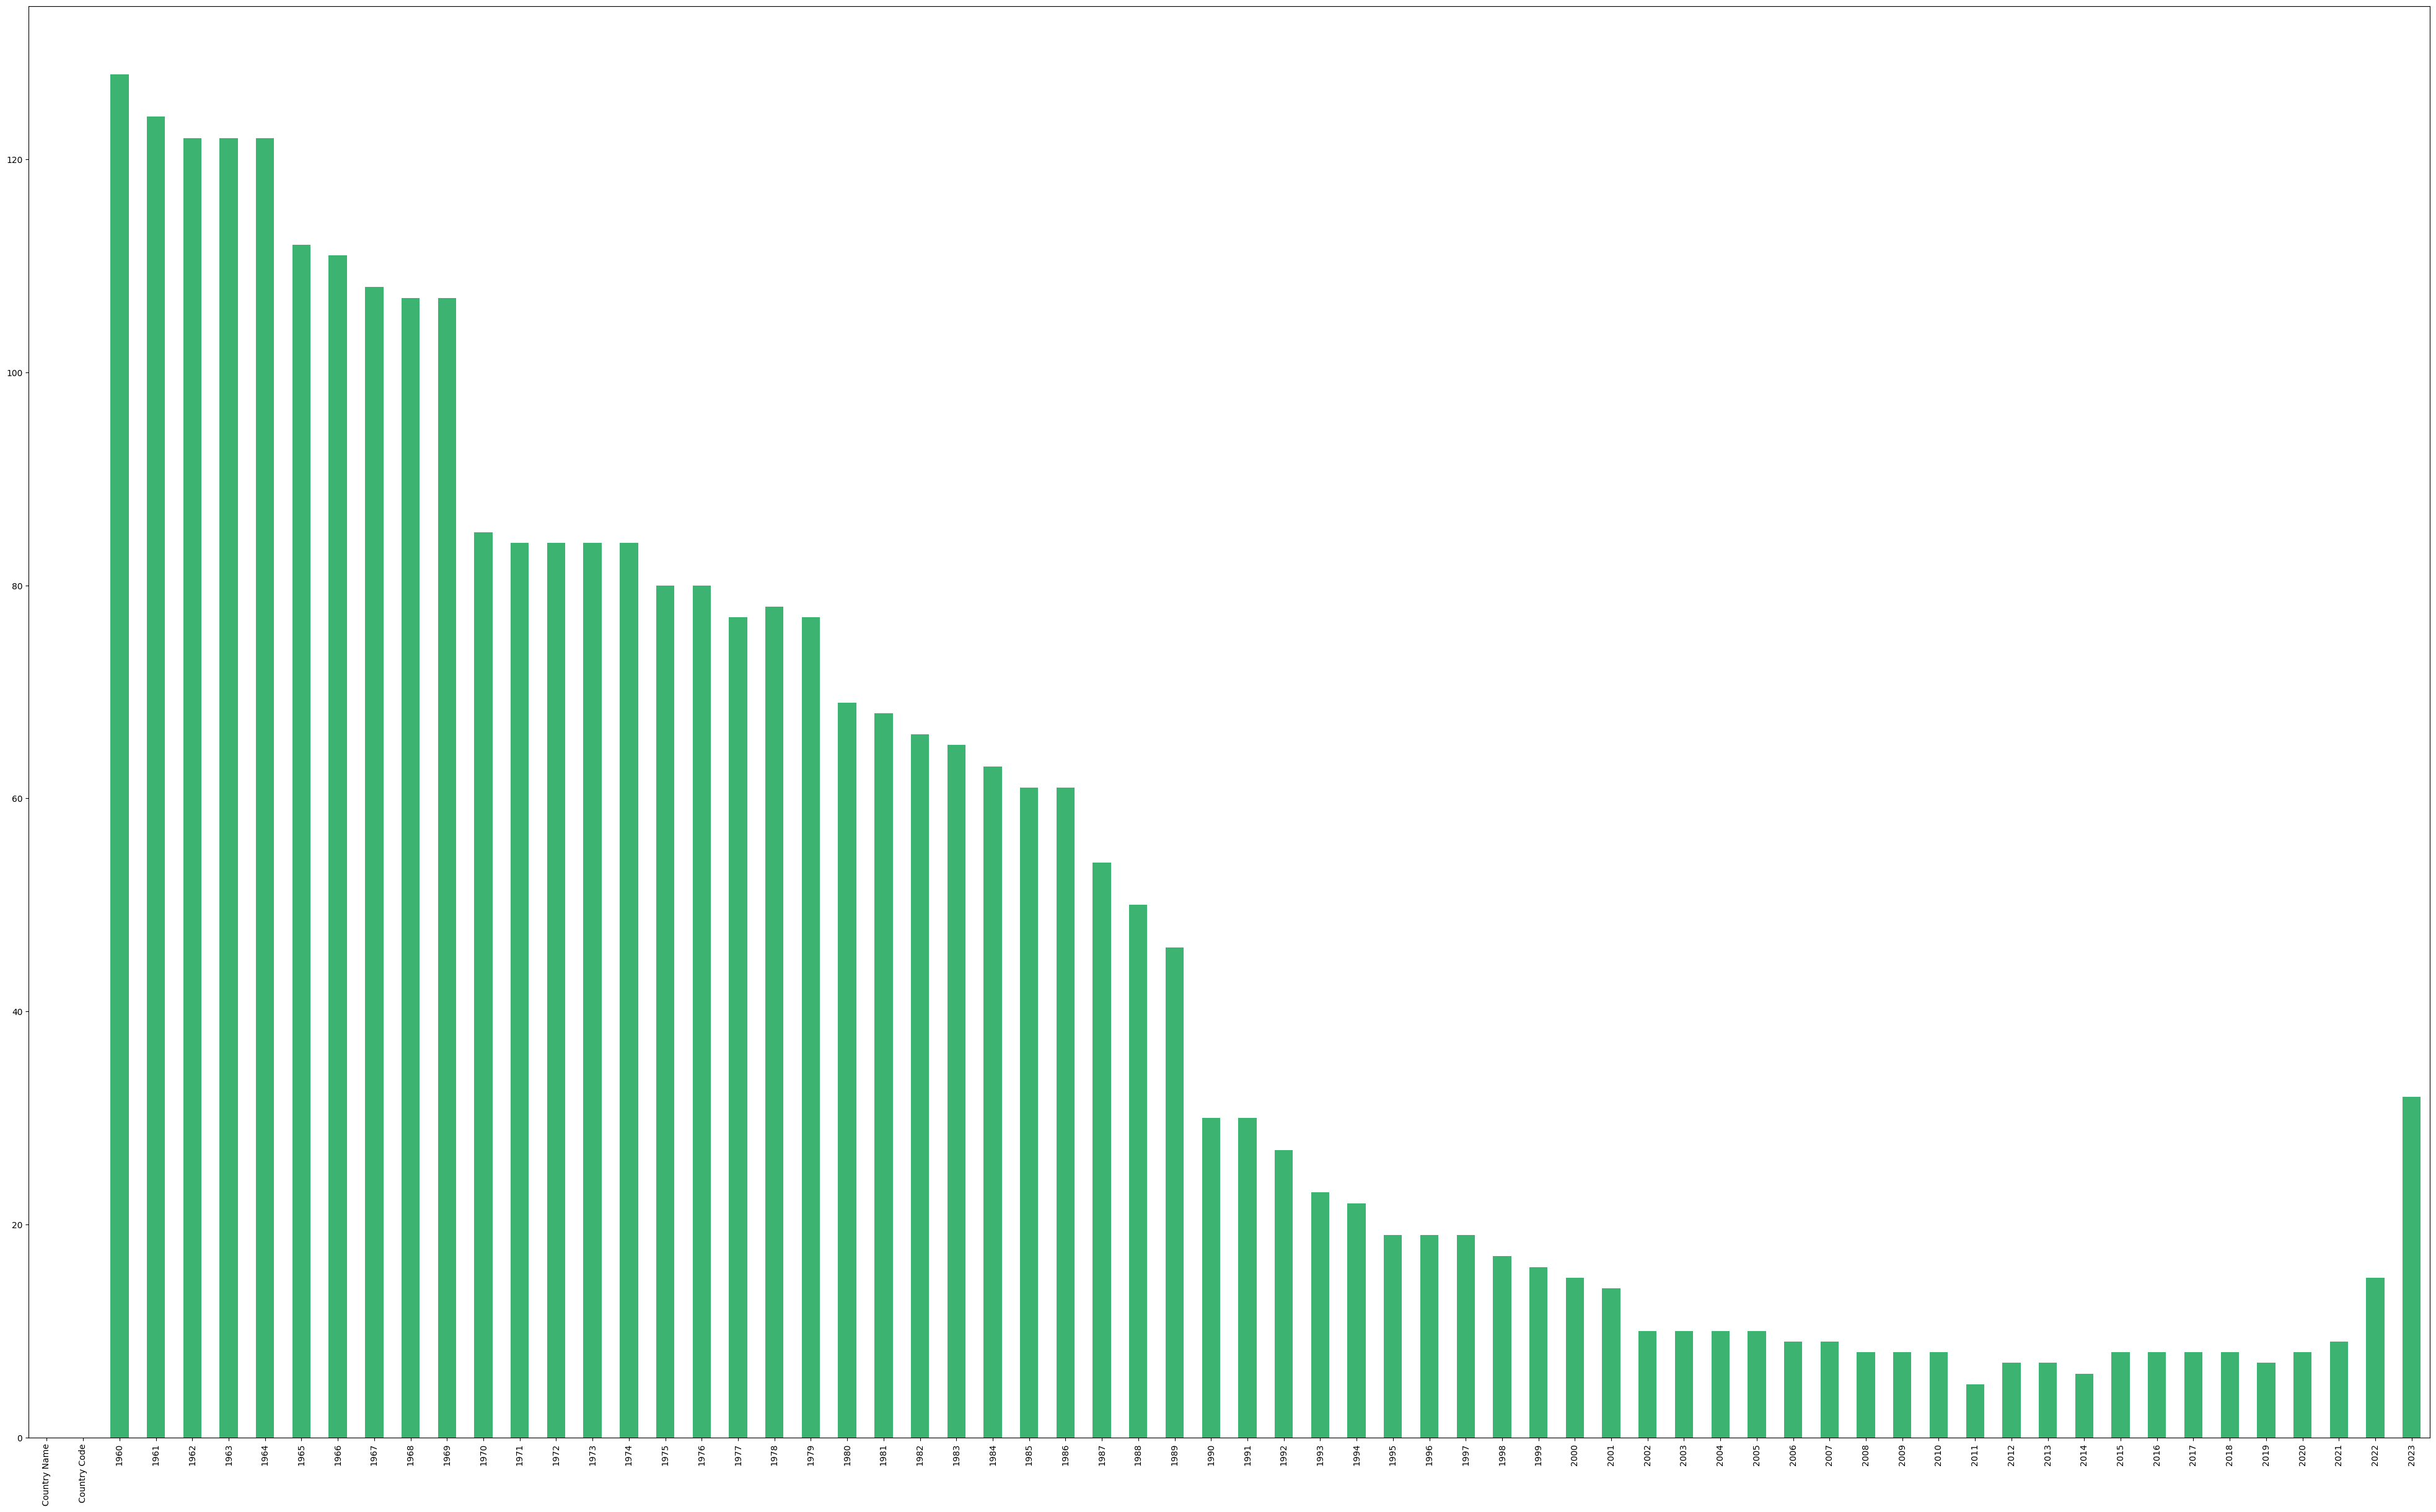

In [5]:
nulls = gdp_df.isnull().sum()

plt.figure(figsize=(50,30))
nulls.plot(kind="bar", color="mediumseagreen")
plt.show()

In [6]:
int(gdp_df.shape[0] - nulls.max())

gdp_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,214.666914,226.978859,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,162.890667,145.568085,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


In [7]:
years = [str(year) for year in range(1960, 2020)]

# I want a dataset with Country Name, Country Code, Year, GDP
gdp_melted = gdp_df.melt(id_vars=["Country Name", "Country Code"], value_vars=years, var_name="Year", value_name="GDP")

gdp_melted["Year"] = gdp_melted["Year"].astype(int)
gdp_melted

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,162.342517
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,122.193931
4,Angola,AGO,1960,NaN
...,...,...,...,...
15955,Kosovo,XKX,2019,4416.029253
15956,"Yemen, Rep.",YEM,2019,693.816508
15957,South Africa,ZAF,2019,6702.526617
15958,Zambia,ZMB,2019,1268.120941


In [8]:
taipei_gdp = [
    (1980, 3446.2),
    (1981, 3967.2),
    (1982, 4338.3),
    (1983, 4843.1),
    (1984, 5441.4),
    (1985, 5808.8),
    (1986, 6541.8),
    (1987, 7475.6),
    (1988, 8264.1),
    (1989, 9243.6),
    (1990, 9999.4),
    (1991, 11091.9),
    (1992, 12171.2),
    (1993, 13186.4),
    (1994, 14353.8),
    (1995, 15475.9),
    (1996, 16602.1),
    (1997, 17731.3),
    (1998, 18526.5),
    (1999, 19903.7),
    (2000, 21460.9),
    (2001, 21512.3),
    (2002, 22927.3),
    (2003, 24277.2),
    (2004, 26562.5),
    (2005, 28767.3),
    (2006, 31220.7),
    (2007, 34138.8),
    (2008, 34951.8),
    (2009, 34484.6),
    (2010, 38404.3),
    (2011, 40532.6),
    (2012, 41741.3),
    (2013, 43435.5),
    (2014, 45494.3),
    (2015, 46911.0),
    (2016, 47272.3),
    (2017, 48500.8),
    (2018, 51005.0),
    (2019, 53476.0),
    (2020, 56037.8)
]

taipei_gdp.extend([(year, taipei_gdp[0][0]) for year in range(1960, 1980)])

taipei_gdp_df = pd.DataFrame(taipei_gdp, columns=["Year", "GDP"])
# add Country Name as Chinese Taipei and Country Code as TPE
taipei_gdp_df["Country Name"] = "Chinese Taipei"
taipei_gdp_df["Country Code"] = "TPE"

display(taipei_gdp_df)
gdp_melted = pd.concat([gdp_melted, taipei_gdp_df], ignore_index=True)
display(gdp_melted.tail())

,Year,GDP,Country Name,Country Code
0,1980,3446.2,Chinese Taipei,TPE
1,1981,3967.2,Chinese Taipei,TPE
2,1982,4338.3,Chinese Taipei,TPE
3,1983,4843.1,Chinese Taipei,TPE
4,1984,5441.4,Chinese Taipei,TPE
...,...,...,...,...
56,1975,1980.0,Chinese Taipei,TPE
57,1976,1980.0,Chinese Taipei,TPE
58,1977,1980.0,Chinese Taipei,TPE
59,1978,1980.0,Chinese Taipei,TPE


,Country Name,Country Code,Year,GDP
16016,Chinese Taipei,TPE,1975,1980.0
16017,Chinese Taipei,TPE,1976,1980.0
16018,Chinese Taipei,TPE,1977,1980.0
16019,Chinese Taipei,TPE,1978,1980.0
16020,Chinese Taipei,TPE,1979,1980.0


In [9]:
nulls = gdp_melted.isnull().sum()

int(gdp_melted.shape[0] - nulls.max())

13045

In [10]:
# fill with the mean of the year
#gdp_melted["GDP"] = gdp_melted.groupby("Country Code")["GDP"].transform(lambda x: x.fillna(x.mean()))
gdp_melted["GDP"] = gdp_melted.groupby("Year")["GDP"].transform(lambda x: x.fillna(x.mean()))


gdp_melted[gdp_melted["GDP"].isnull()]

,Country Name,Country Code,Year,GDP


In [11]:
gdp_melted = gdp_melted[~gdp_melted["Country Code"].isin(["INX", "GIB", "VGB"])]


gdp_melted.loc[gdp_melted["Country Code"] == "PRK", "GDP"] = gdp_melted[gdp_melted["Country Code"] == "KOR"]["GDP"].values

# North korea GDP per capita 2019: 640
n_s_korea_ratio = 31902 / 640
gdp_melted.loc[gdp_melted["Country Code"] == "PRK", "GDP"] = gdp_melted[gdp_melted["Country Code"] == "PRK"]["GDP"].values / n_s_korea_ratio

gdp_df = gdp_melted
gdp_df[gdp_df["Country Name"] == "Togo"]

,Country Name,Country Code,Year,GDP
232,Togo,TGO,1960,103.585132
498,Togo,TGO,1961,106.324979
764,Togo,TGO,1962,109.410166
1030,Togo,TGO,1963,116.488867
1296,Togo,TGO,1964,132.328391
1562,Togo,TGO,1965,145.301081
1828,Togo,TGO,1966,162.143110
2094,Togo,TGO,1967,167.188771
2360,Togo,TGO,1968,167.597329
2626,Togo,TGO,1969,178.304318


In [12]:
def rename_NOC(df1:pd.DataFrame,df2:pd.DataFrame) -> dict:
    noc_team_1 = df1[['NOC', 'Team']].drop_duplicates().apply(tuple, axis=1)
    noc_team_2 = df2[['NOC', 'Team']].drop_duplicates().apply(tuple, axis=1)
    
    rename = {
            "URS": "RUS",   # Soviet Union -> Russia
            "IRI": "IRN",   # Iran -> Iran
            "BRU": "BRN",   # Brunei -> Brunei
            "EUN": "EUU",   # European Union -> European Union
            "GDR": "DEU",   # East Germany -> Germany
            "FRG": "DEU",   # West Germany -> Germany
            "PLE": "PSE",   # Palestine -> Palestine
            "TCH": "CZE",   # Czechoslovakia -> Czech Republic
            "SKN": "KNA",   # Saint Kitts and Nevis -> Saint Kitts and Nevis
            "MGL": "MNG",   # Mongolia -> Mongolia
            "BIZ": "BLZ",   # Belize -> Belize
            "BER": "BMU",   # Bermuda -> Bermuda
            "SCG": "SRB",   # Serbia and Montenegro -> Serbia
            "YAR": "YEM",   # Yemen Arab Republic -> Yemen
            "GUA": "GTM",   # Guatemala -> Guatemala
            "LAT": "LVA",   # Latvia -> Latvia
            "MAD": "MDG",   # Madagascar -> Madagascar
            "CHA": "TCD",   # Chad -> Chad
            "GBS": "GNB",   # Guinea-Bissau -> Guinea-Bissau
            "ISV": "VIR",   # U.S. Virgin Islands -> U.S. Virgin Islands
            "ROT": "ROU",   # Romania -> Romania
            "ANT": "CUW",   # Netherlands Antilles -> Curaçao
            "ZIM": "ZWE",   # Zimbabwe -> Zimbabwe
            "MAW": "MWI",   # Malawi -> Malawi
            "ZAM": "ZMB",   # Zambia -> Zambia
            "RHO": "ZWE",   # Rhodesia -> Zimbabwe
            "GEQ": "GNQ",   # Equatorial Guinea -> Equatorial Guinea
            "SOL": "SLB",   # Solomon Islands -> Solomon Islands
            "COK": "NZL",   # Cook Islands -> New Zeland
            "ARU": "ABW",   # Aruba -> Aruba
            "BHU": "BTN",   # Bhutan -> Bhutan
            "VIE": "VNM",   # Vietnam -> Vietnam
            "UAR": "EGY",   # United Arab Republic -> Egypt
            "TGA": "TON",   # Tonga -> Tonga
            "KOS": "XKX",   # Kosovo -> Kosovo
            "LES": "LSO"    # Lesotho -> Lesotho
        }

    for abb_country_1, name_country_1 in noc_team_1:
        for abb_country_2, name_country_2 in noc_team_2:
            if abb_country_1 != abb_country_2 and name_country_1 == name_country_2:
                rename[abb_country_1] = abb_country_2
    return rename


In [13]:

gdp_df = gdp_df.rename(columns={"Country Code": "NOC", "Country Name": "Team"})

rename = rename_NOC(polished_df, gdp_df)

polished_df["NOC"] = polished_df["NOC"].replace(rename)

gdp_df = gdp_df.drop(columns=["Team"])
df = polished_df.merge(gdp_df, on=["Year", "NOC"], how="inner")

# drop everything that is before 1960
df = df[df["Year"] >= 1960]

rename

{'URS': 'RUS',
 'IRI': 'IRN',
 'BRU': 'BRN',
 'EUN': 'EUU',
 'GDR': 'DEU',
 'FRG': 'DEU',
 'PLE': 'PSE',
 'TCH': 'CZE',
 'SKN': 'KNA',
 'MGL': 'MNG',
 'BIZ': 'BLZ',
 'BER': 'BMU',
 'SCG': 'SRB',
 'YAR': 'YEM',
 'GUA': 'GTM',
 'LAT': 'LVA',
 'MAD': 'MDG',
 'CHA': 'TCD',
 'GBS': 'GNB',
 'ISV': 'VIR',
 'ROT': 'ROU',
 'ANT': 'ATG',
 'ZIM': 'ZWE',
 'MAW': 'MWI',
 'ZAM': 'ZMB',
 'RHO': 'ZWE',
 'GEQ': 'GNQ',
 'SOL': 'SLB',
 'COK': 'NZL',
 'ARU': 'ABW',
 'BHU': 'BTN',
 'VIE': 'VNM',
 'UAR': 'EGY',
 'TGA': 'TON',
 'KOS': 'XKX',
 'LES': 'LSO',
 'NED': 'NLD',
 'BUL': 'BGR',
 'GRE': 'GRC',
 'NCA': 'NIC',
 'NGR': 'NGA',
 'ALG': 'DZA',
 'KUW': 'KWT',
 'BRN': 'BHR',
 'LIB': 'LBN',
 'MAS': 'MYS',
 'RSA': 'ZAF',
 'TAN': 'TZA',
 'SUD': 'SDN',
 'LBA': 'LBY',
 'KSA': 'SAU',
 'INA': 'IDN',
 'PHI': 'PHL',
 'UAE': 'ARE',
 'GER': 'DEU',
 'SRI': 'LKA',
 'CHI': 'CHL',
 'SUI': 'CHE',
 'CRC': 'CRI',
 'SLO': 'SVN',
 'POR': 'PRT',
 'ANG': 'AGO',
 'BAN': 'BGD',
 'URU': 'URY',
 'PUR': 'PRI',
 'HON': 'HND',
 'MRI': 'M

In [14]:
df[df["Team"] == "Togo"]

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
1070,1832,1014,Martin Natchaba Adouna,M,28.0,167.0,68.0,Togo,TGO,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's Long Jump,No Medal,False,24.382373,203.390873
1302,2201,1223,Anoumou Aguiar,M,23.0,172.0,67.0,Togo,TGO,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,No Medal,False,22.647377,532.982344
1441,2378,1327,Koku Mensah Ahiaku,M,29.0,175.0,69.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's Road Race, Individual",No Medal,False,22.530612,582.238043
1535,2548,1434,Kouame Calixte Aholou,M,21.0,174.0,65.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,21.469150,582.238043
1875,3053,1703,Ayewoubo Akomatsri,M,24.0,168.0,54.0,Togo,TGO,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Bantamweight,No Medal,False,19.132653,532.982344
1882,3062,1711,Kossi Casimir Akoto,M,23.0,167.0,73.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres,No Medal,False,26.175195,582.238043
1883,3063,1711,Kossi Casimir Akoto,M,23.0,167.0,73.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,26.175195,582.238043
1884,3064,1711,Kossi Casimir Akoto,M,27.0,167.0,73.0,Togo,TGO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres,No Medal,False,26.175195,465.488186
1885,3065,1711,Kossi Casimir Akoto,M,27.0,167.0,73.0,Togo,TGO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,26.175195,465.488186
3873,6035,3392,Koukou Franck Amgnigan,M,21.0,181.0,76.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,23.198315,582.238043


In [15]:
# drop first column
df = df.drop(columns=["Unnamed: 0"])
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,False,24.691358,366.460692
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,False,20.761246,6300.582180
2,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,False,23.661439,24345.914822
3,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,25783.450488
4,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,False,21.953246,24345.914822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155475,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No Medal,False,26.927438,4258.160261
155476,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No Medal,False,24.489796,6094.017990
155477,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal,False,21.499597,1771.594116
155478,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal,False,21.499597,4102.364746


In [16]:
df[df["Team"] == "Togo"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Won Medal,BMI,GDP
1070,1014,Martin Natchaba Adouna,M,28.0,167.0,68.0,Togo,TGO,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's Long Jump,No Medal,False,24.382373,203.390873
1302,1223,Anoumou Aguiar,M,23.0,172.0,67.0,Togo,TGO,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,No Medal,False,22.647377,532.982344
1441,1327,Koku Mensah Ahiaku,M,29.0,175.0,69.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's Road Race, Individual",No Medal,False,22.530612,582.238043
1535,1434,Kouame Calixte Aholou,M,21.0,174.0,65.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,21.469150,582.238043
1875,1703,Ayewoubo Akomatsri,M,24.0,168.0,54.0,Togo,TGO,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Bantamweight,No Medal,False,19.132653,532.982344
1882,1711,Kossi Casimir Akoto,M,23.0,167.0,73.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres,No Medal,False,26.175195,582.238043
1883,1711,Kossi Casimir Akoto,M,23.0,167.0,73.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,26.175195,582.238043
1884,1711,Kossi Casimir Akoto,M,27.0,167.0,73.0,Togo,TGO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres,No Medal,False,26.175195,465.488186
1885,1711,Kossi Casimir Akoto,M,27.0,167.0,73.0,Togo,TGO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,26.175195,465.488186
3873,3392,Koukou Franck Amgnigan,M,21.0,181.0,76.0,Togo,TGO,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,False,23.198315,582.238043


In [17]:
df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
Won Medal    0
BMI          0
GDP          0
dtype: int64

In [18]:
# save into polished3_with_gdp.csv

df.to_csv(base_file_path+"polished3_with_moy_gdp.csv", index=False)

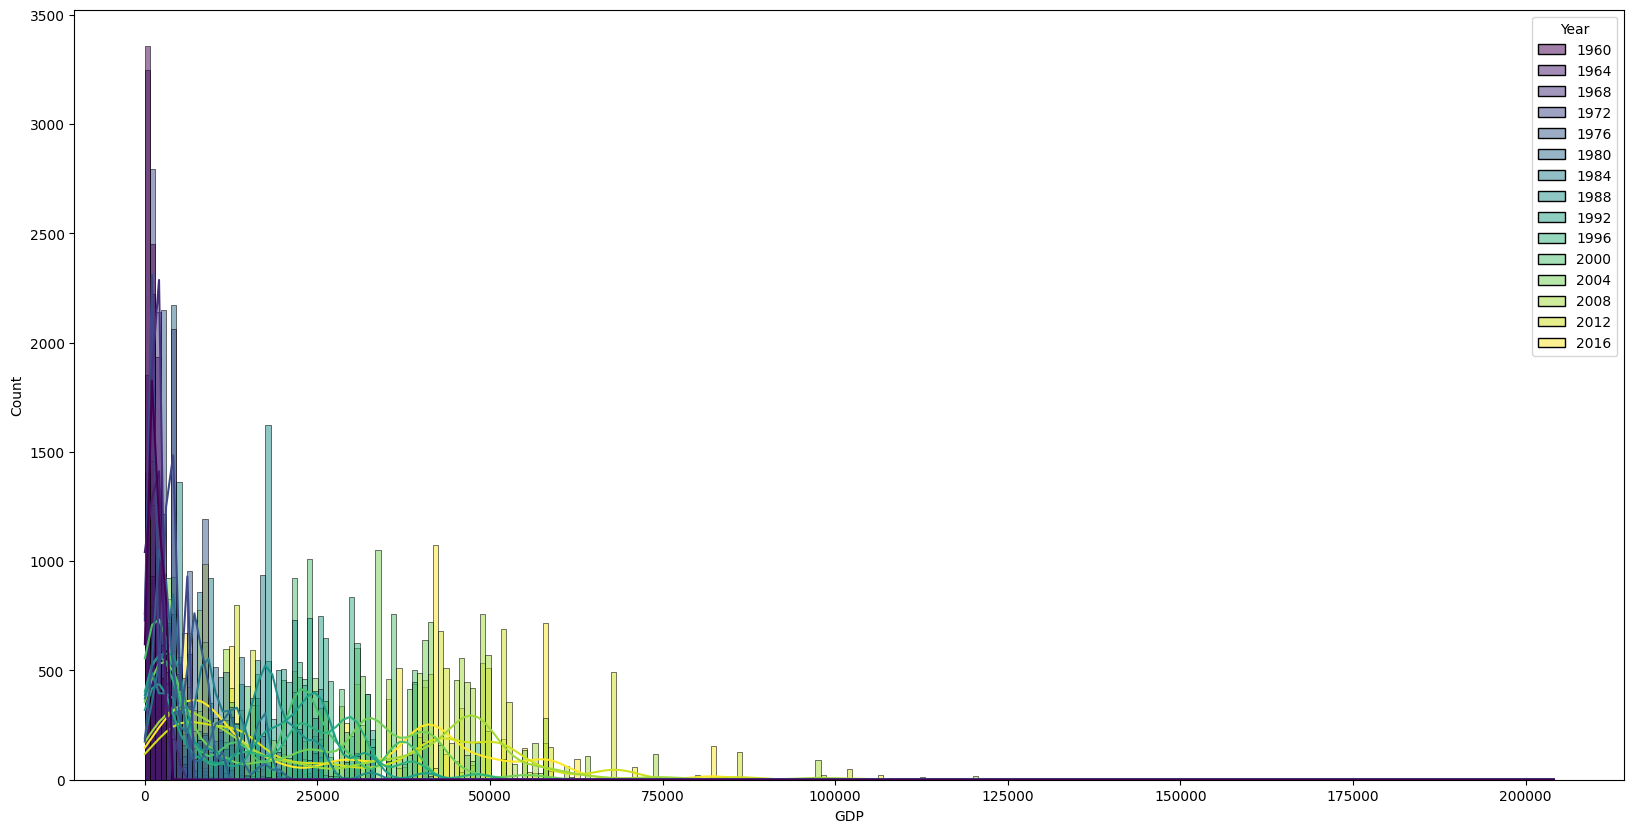

In [19]:
# I want a hist of the GDP per capita by year

plt.figure(figsize=(20,10))
sns.histplot(data=df, x="GDP", hue="Year", kde=True, palette="viridis")
plt.show()
